Name : Chathumini B.G.D.T.

Index Number : 190107T

Github Repo:
https://github.com/dulmi-19/Image-Processing-and-Machine-Vision

Question 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0


train_images.shape:  (60000, 32, 32)
train_labels.shape:  (60000,)
test_images.shape: (10000, 32, 32)
test_labels.shape: (10000,)


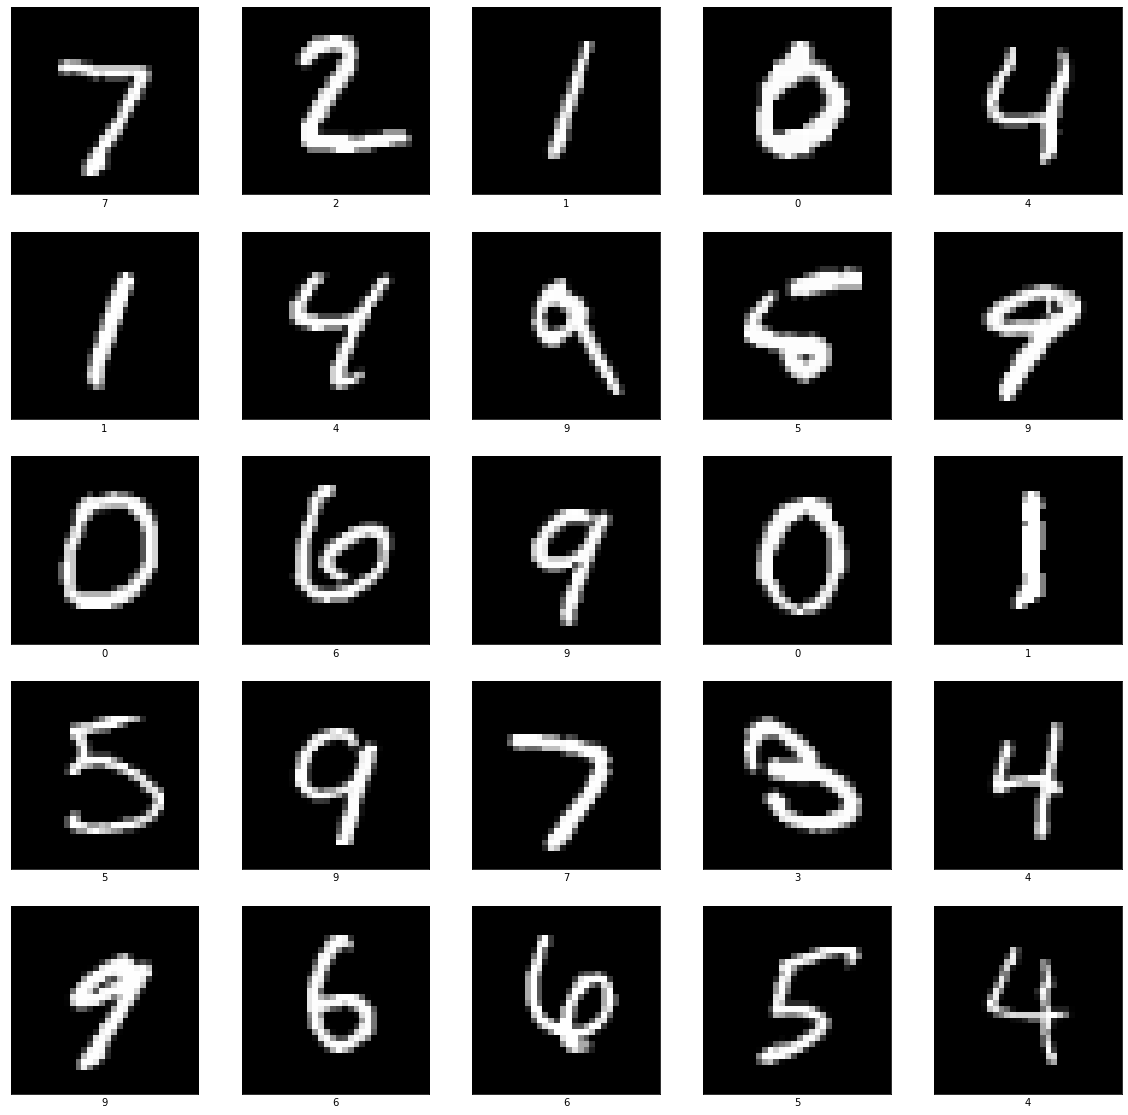

In [2]:
plt.figure(figsize=(20,20))
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.xticks([]),plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.reshape(test_images[j],[32,32]),cmap=plt.cm.gray)
    plt.xlabel(class_names[test_labels[j]])
plt.show()

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation = 'relu',input_shape = (32,32,1)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation = 'relu'))
model.add(layers.AveragePooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(120,activation = 'relu'))
model.add(layers.Dense(84,activation = 'relu'))
model.add(layers.Dense(10))

model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model.summary)
model.fit(train_images,train_labels,epochs = 5)
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose = 2)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000020F7258BC10>>
Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2244 - accuracy: 0.9314
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0722 - accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0519 - accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0417 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0319 - accuracy: 0.9898
313/313 - 2s - loss: 0.0389 - accuracy: 0.9880 - 2s/epoch - 7ms/step


Question 2

In [4]:
# for CIFAR10
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist
import tensorflow as tf
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation = 'relu',input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model.summary)

model.fit(train_images,train_labels,epochs = 5)
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose = 2)
print(test_accuracy)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000020F488F4DC0>>
Epoch 1/5
1563/1563 [==============================] - 71s 44ms/step - loss: 1.6020 - accuracy: 0.4129
Epoch 2/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2518 - accuracy: 0.5524
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0826 - accuracy: 0.6189
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9728 - accuracy: 0.6603
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8935 - accuracy: 0.6867
313/313 - 4s - loss: 0.9946 - accuracy: 0.6574 - 4s/epoch - 12ms/step
0.6574000120162964


Question 3

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

model_base = models.Sequential()
model_base.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,1)))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation = 'relu'))

model_base.add(layers.Flatten())
model_base.add(layers.Dense(64,activation = 'relu'))
model_base.add(layers.Dense(10))

model_base.compile(optimizer =keras.optimizers.Adam(),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model_base.summary)

model_base.fit(train_images,train_labels,epochs = 2)
test_loss, test_accuracy = model_base.evaluate(test_images,test_labels,verbose = 2)
model_base.save_weights('saved_weights/')

train_images.shape:  (60000, 32, 32)
train_labels.shape:  (60000,)
test_images.shape: (10000, 32, 32)
test_labels.shape: (10000,)
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000020F720A5B70>>
Epoch 1/2
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1372 - accuracy: 0.9581
Epoch 2/2
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0444 - accuracy: 0.9865
313/313 - 3s - loss: 0.0458 - accuracy: 0.9849 - 3s/epoch - 11ms/step


Question 4

In [7]:
model_lw = models.Sequential()
model_lw.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,1)))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation = 'relu'))

model_lw.add(layers.Flatten())
model_lw.add(layers.Dense(64,activation = 'relu'))
model_lw.add(layers.Dense(10))

model_lw.compile(optimizer =keras.optimizers.Adam(),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(model_lw.summary)

model_lw.fit(train_images,train_labels,epochs = 2)
test_loss, test_accuracy = model_lw.evaluate(test_images,test_labels,verbose = 2)
model_lw.save('saved_model/')

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000020F72322350>>
Epoch 1/2
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1314 - accuracy: 0.9608
Epoch 2/2
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0430 - accuracy: 0.9873
313/313 - 4s - loss: 0.0459 - accuracy: 0.9843 - 4s/epoch - 12ms/step


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Question 5

In [8]:
# loading the model
model_ld = keras.models.load_model('saved_model/')
print(model_ld.summary())
model_ld.evaluate(test_images,test_labels, verbose=2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

[0.04589089751243591, 0.9843000173568726]

Question 6

In [9]:
base_inputs = model_ld.layers[0].input
base_outputs = model_ld.layers[-2].output
output = layers.Dense(10)(base_outputs)

new_model = keras.Model(inputs=base_inputs, outputs = output)
new_model.compile(optimizer =keras.optimizers.Adam(),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])
print(new_model.summary)

new_model.fit(train_images,train_labels,epochs = 3,verbose = 2)
new_model.evaluate(test_images, test_labels, verbose=2)

<bound method Model.summary of <keras.engine.functional.Functional object at 0x0000020F72378370>>
Epoch 1/3
1875/1875 - 58s - loss: 0.0702 - accuracy: 0.9793 - 58s/epoch - 31ms/step
Epoch 2/3
1875/1875 - 57s - loss: 0.0261 - accuracy: 0.9918 - 57s/epoch - 30ms/step
Epoch 3/3
1875/1875 - 57s - loss: 0.0197 - accuracy: 0.9937 - 57s/epoch - 30ms/step
313/313 - 3s - loss: 0.0261 - accuracy: 0.9923 - 3s/epoch - 11ms/step


[0.02605402283370495, 0.9922999739646912]

Question 7

In [10]:
#transfer learning
model_for_tl =keras.models.load_model('saved_model/')
model_for_tl.trainable = False
for layer in model_for_tl.layers:
    assert layer.trainable == False

base_inputs = model_for_tl.layers[0].input
base_outputs = model_for_tl.layers[-2].output
output = layers.Dense(10)(base_outputs)

new_model = keras.Model(inputs=base_inputs, outputs = output)
new_model.compile(optimizer =keras.optimizers.Adam(),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['accuracy'])

new_model.fit(train_images,train_labels,epochs = 3,verbose = 2)
new_model.evaluate(test_images, test_labels, verbose=2)



Epoch 1/3
1875/1875 - 20s - loss: 0.2647 - accuracy: 0.9391 - 20s/epoch - 11ms/step
Epoch 2/3
1875/1875 - 19s - loss: 0.0253 - accuracy: 0.9931 - 19s/epoch - 10ms/step
Epoch 3/3
1875/1875 - 20s - loss: 0.0202 - accuracy: 0.9940 - 20s/epoch - 10ms/step
313/313 - 3s - loss: 0.0259 - accuracy: 0.9923 - 3s/epoch - 11ms/step


[0.025881975889205933, 0.9922999739646912]

Question 8

In [13]:
tl_model=keras.applications.resnet_v2.ResNet50V2()
tl_model.trainable=False

for layer in tl_model.layers:
    assert layer.trainable==False

base_inputs=tl_model.layers[0].input
base_ouputs=tl_model.layers[-2].output
output=layers.Dense(5)(base_ouputs)

tl_model=keras.Model(inputs=base_inputs,outputs=output)
tl_model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
print(tl_model.summary())

train_images=tf.random.normal(shape=(5,224, 224, 3))
train_labels=tf.constant([0,1,2,3,4])

tl_model.fit(train_images,train_labels,epochs=18,verbose=2)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            